In [133]:
import numpy as np
import pandas as pd

FILEPATH = "titanic.csv"

df = pd.read_csv(FILEPATH)

df.shape

(891, 12)

# Review

- What percent of passengers in Titanic embarked at C?

- What percent of female passengers in Titanic embarked at C?

Work on your own, then compare solutions with a neighbor and discuss

In [52]:
total = df['Embarked'].notna().sum()

In [55]:
df['Embarked'].notna().value_counts()

True     889
False      2
Name: Embarked, dtype: int64

In [53]:
total

889

In [54]:
len(df[df['Embarked'] == 'C'])/total * 100

18.89763779527559

In [51]:
print('Percentage of passengers in Titanic that embarked at C is: 18.89')

Percentage of passengers in Titanic that embarked at C is: 18.89


In [87]:
# Number of female passegers that Embarked at C
len(df[(df['Embarked'] == 'C') & (df['Sex'] == 'female')])

73

In [83]:
# Removes null values and finds total number of female passengers that embarked on the titanic
total_female_on_titanic = df[df['Embarked'].notnull()]['Sex'].value_counts()['female']

In [84]:
total_female_on_titanic 

312

In [77]:
df[(df['Embarked'] == 'C') & (df['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C


In [85]:
print('Percentage of female passengers that embarked at C is: '+ str((73/312) * 100))

Percentage of female passengers that embarked at C is: 23.397435897435898


## What percentage of passengers Embarked at section C?

In [40]:
pd.crosstab(df['Sex'], df['Embarked'])

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


## What percentage of passengers in Titanic embarked at C?

In [42]:
(len(df[df['Embarked'] == 'C'])/df['Embarked'].notna().sum()) * 100

18.89763779527559

## What percentage of female passengers in Titanic embarked at C?

In [67]:
df['Embarked'].dropna().unique()

array(['S', 'C', 'Q'], dtype=object)

In [69]:
# Total female passengers that there is an associated embarked port for them
S = 0
for embarked_type in df['Embarked'].dropna().unique():
    S += len(df[(df['Embarked'] == embarked_type) & (df['Sex'] == 'female')])

In [70]:
S

312

In [72]:
len(df[(df['Embarked'] == 'C') & (df['Sex'] == 'female')])

73

In [73]:
(73/312) * 100

23.397435897435898

# An Introduction to Descriptive Statistics

- At this point in our course, we've had plenty of time, experience, and practice in manipulating our data. 

- However, to really _understand_ our data and underlying patterns across it, we need to dive a layer deeper into the mathematics behind data mechanics and dynamics.

- In order to be able to draw conclusions from our data, we need to be able to **describe and interpret our data**.

- This will become essential for more advanced data science concepts in data visualization, machine learning, and deep learning.

## Measures of Central Tendency

A [**Central Tendency**](https://en.wikipedia.org/wiki/Central_tendency) is a central (typical) value for a probability distribution

- In statistics, we often find that describing data by _averages_ allows us to more often make more powerful assertions regarding the data as a whole. 

- We often use **three key measures of central tendency** to help describe the **centroid** (arithmetic mean trend across a distribution) of our data:
    - **Mean**
    - **Median**
    - **Mode**

### The mean is the raw average value across our data. 

Calculating the mean is simple: _compute the sum of all values across our data and divide by the total number of values in our dataset_.

We've been using the mean for years and years, but such a surprisingly simple arithmetic calculation turns out to have massive implications across being able to critically understand and break down complex datasets! 


### Activity: _Write a function to compute the mean from an arbitrary dataset._

In [39]:
import numpy as np

data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# TODO: Complete this function by having the function return the average value of our dataset.
def compute_mean(dataset):
    """ Main function that calculates the average value across our data. """
    
    return sum(dataset)/len(dataset)

compute_mean(data)

4.391304347826087

## Activity (Titanic):

- What is the average age of male passengers that survived?

Once you've found the average, talk with a neighbor who has also found the average, and compare how you each came about to your solution

In [91]:
df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'].mean()

27.276021505376345

In [94]:
print(compute_mean(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'].dropna().values))

27.276021505376345


In [97]:
df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'].dropna().agg(compute_mean)

27.276021505376345

### The median is the "middle value" or midpoint across our data.

Determining the median is as simple as it sounds: _find the data value lying in the exact middle of our dataset_.

One critical exception occurs when our data has an even number of values and thus has **two values** at its center: _in these cases, find the **mean** value of the two medians to obtain the true median across our data_. 

**Remember:** the median can only be calculated across _sorted data_!

If data is distributed in a non-normal manner, then we can learn a great deal from interpreting what the exact median value of our dataset is. 

### Activity: _Write a function to compute the median from an arbitrary dataset._

Once you write the function, compare with a neighbor's implementation

In [106]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# TODO: Complete this function by having the function return the exact true median value of our dataset.
# HINT: Consider using DataFrame slicing to help with identifying the correct median value(s).
def compute_median(dataset):
    """ Main function that determines the median value across our data. """
    count = len(dataset)
    sorted_data = np.sort(dataset)
    
    if count < 1:      # if the length of the dataset is less than 1
        return [] 
    if count % 2 == 1:        # if the length of the dataset odd
        return sorted_data[int((count - 1)/2)] 
    else:               # else if the length of the dataset is even
        return (sorted_data[int(count/2)] + sorted_data[int(count/2) - 1])/2
    
compute_median(data)

4

In [108]:
# verify with numpy
np.median(data)

4.0

### The mode is the most commonly occurring value or feature across our data.

Determining the mode is relatively simple: _find the value that occurs most frequently across our data_.

Remember that if all values across our data are unique and only occur once, then our data **has no mode**!

The mode is also an interesting measure of _central tendency_ in that it can be applied towards categorical (non-numerical) data; one can find frequently occurring categories without running any calculations. 

### Activity: _Write a function to compute the mode from an arbitrary dataset._

Once you write the function, compare with a neighbor's implementation

In [116]:
# NOTE: Tricker than it looks!
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# TODO: Complete this function by having the function return the relative mode across our dataset.
# HINT: Remember histograms and tokenization from CS 1.2? How many they help you here? 
def compute_mode(dataset):
    """ Main function that determines the mode value across our data. """
 
    d = {}
    for i in dataset:
        if i not in d:
            d[i] = 1
        else:
            d[i] += 1
    return (d, max(d, key=d.get))

compute_mode(data)

({1: 2, 3: 5, 5: 2, 2: 1, 7: 3, 8: 1, 4: 2, 10: 2, 0: 3, 6: 1, 9: 1}, 3)

In [111]:
# Verify from stats

from scipy import stats

stats.mode(data)

ModeResult(mode=array([3]), count=array([5]))

## Measures of Spread and Variance

Like our friends in the central tendency community, measures of spread and variance do their best to describe patterns across our data as a whole.

However, unlike measures of central tendency, which focus on the distribution of our data towards an arithmetic centroid, measures of spread and variance talk about the shape and layout of our data all across the board!

In this course, there are **two key measures of spread and variance** to help describe the shape of our data:
- **Range**
- **Variance**, **Standard Deviation**

## What is Range?

**Range** is the difference between the highest and lowest values in a data set. It is one of the simplest measures of **spread** (the extent to which a distribution is stretched or squeezed). We'll use variance/standard deviation to help give more information around all of this!

## What is standard deviation or variance?

Let's learn it by example:
    
- We measured the number of rainy days during Fall in three different cities in the last 5 years:

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'Rainy':[29,28,32,35,36,12,18,30,45,55, 32,32,32,32,32], 'City':['City_A']*5 + ['City_B']*5 + ['City_C']*5})
df

,Rainy,City
0,29,City_A
1,28,City_A
2,32,City_A
3,35,City_A
4,36,City_A
5,12,City_B
6,18,City_B
7,30,City_B
8,45,City_B
9,55,City_B


## Number of rainy days in last 5 years for 3 cities

In [120]:
np.var(df)

Rainy    89.866667
dtype: float64

## What is the mean of rainy days for City A, B and C?

In [121]:
df[df['City'] == 'City_A']['Rainy'].mean()

32.0

## Which city has more variance?

In [125]:
np.std(df[df['City'] == 'City_A']['Rainy'])

3.1622776601683795

In [126]:
np.std(df[df['City'] == 'City_B']['Rainy'])

16.112107248898266

In [127]:
np.std(df[df['City'] == 'City_C']['Rainy'])

0.0

## Let's plot the variations in the data

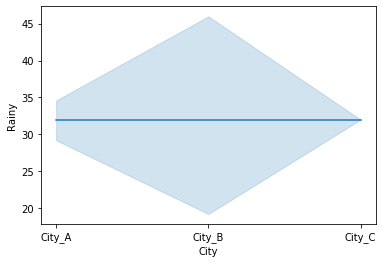

In [128]:
sns.lineplot(y='Rainy', x='City', data=df)
plt.show()

## Most (or majority) of the values (rainy days) in Cities A, B and C are between mean - std and mean + std

In [131]:
print([32 - np.std(df[df['City'] == 'City_A']['Rainy']), 32 + np.std(df[df['City'] == 'City_A']['Rainy'])])

print([32 - np.std(df[df['City'] == 'City_B']['Rainy']), 32 + np.std(df[df['City'] == 'City_B']['Rainy'])])

print([32 - np.std(df[df['City'] == 'City_C']['Rainy']), 32 + np.std(df[df['City'] == 'City_C']['Rainy'])])


[28.837722339831622, 35.16227766016838]
[15.887892751101734, 48.11210724889827]
[32.0, 32.0]


# Percentile

## Activity - Compute 75% Percentile for Fare in Titanic
We want to compute:

- At which dollar amount did 75 percent of the passengers pay less than the Fare amount?

How would we do this?

**Hint:** Use Numpy's [percentile](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) function

When you're done, compare implementations with a neighbor

In [136]:
fare_values = df['Fare'].dropna().values

np.percentile(fare_values, 75) # 75% of passengers paid less than $31

31.0

## Verify that 75 percent of passengers paid less than 31.0 Dollar

In [152]:
(len(df[(df['Fare']) <= np.percentile(fare_values, 75)])/len(fare_values)) * 100

75.08417508417509

In [148]:
# Slice the data based on Fare for those paid less than $31
numbers_below_percentile = df[(df['Fare']) <= np.percentile(fare_values, 75)]

# Compute the size of the sliced dataframe and divide over total number of passengers
pr_below_percentile = (len(numbers_below_percentile)/len(fare_values) * 100)
pr_below_percentile

75.08417508417509

In [151]:
# Side note: 50 percentile is always the median